In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Employee.csv")

In [5]:
data.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [16]:
import collections
counter = collections.Counter(data['Education'].values)
print(counter)

Counter({'Bachelors': 3601, 'Masters': 873, 'PHD': 179})


In [74]:
df = data.copy()

In [75]:
dummies = pd.get_dummies(df['Education'])
df_onehot = pd.concat([dummies,df], axis = 1)

In [76]:
df_onehot.drop("Education",axis=1,inplace=True)

In [77]:
df_onehot.head()

,Bachelors,Masters,PHD,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,0,0,2017,Bangalore,3,34,Male,No,0,0
1,1,0,0,2013,Pune,1,28,Female,No,3,1
2,1,0,0,2014,New Delhi,3,38,Female,No,2,0
3,0,1,0,2016,Bangalore,3,27,Male,No,5,1
4,0,1,0,2017,Pune,3,24,Male,Yes,2,1


In [78]:
dummies = pd.get_dummies(df_onehot['Gender'],drop_first=True)
df_onehot = pd.concat([dummies,df_onehot], axis = 1)

In [79]:
df_onehot.drop("Gender",axis=1,inplace=True)

In [80]:
df_onehot.head()

,Male,Bachelors,Masters,PHD,JoiningYear,City,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,1,0,0,2017,Bangalore,3,34,No,0,0
1,0,1,0,0,2013,Pune,1,28,No,3,1
2,0,1,0,0,2014,New Delhi,3,38,No,2,0
3,1,0,1,0,2016,Bangalore,3,27,No,5,1
4,1,0,1,0,2017,Pune,3,24,Yes,2,1


In [81]:
counter = collections.Counter(df_onehot['City'].values)
print(counter)

Counter({'Bangalore': 2228, 'Pune': 1268, 'New Delhi': 1157})


In [82]:
dummies = pd.get_dummies(df['City'])
df_onehot = pd.concat([df_onehot,dummies], axis = 1)
df_onehot.drop("City",axis=1,inplace=True)

In [83]:
df_onehot.head()

,Male,Bachelors,Masters,PHD,JoiningYear,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune
0,1,1,0,0,2017,3,34,No,0,0,1,0,0
1,0,1,0,0,2013,1,28,No,3,1,0,0,1
2,0,1,0,0,2014,3,38,No,2,0,0,1,0
3,1,0,1,0,2016,3,27,No,5,1,1,0,0
4,1,0,1,0,2017,3,24,Yes,2,1,0,0,1


In [84]:
counter = collections.Counter(df['EverBenched'].values)
print(counter)

Counter({'No': 4175, 'Yes': 478})


In [85]:
dummies = pd.get_dummies(df['EverBenched'])
df_onehot = pd.concat([df_onehot,dummies], axis = 1)
df_onehot.drop("EverBenched",axis=1,inplace=True)

In [86]:
df_onehot

,Male,Bachelors,Masters,PHD,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Bangalore,New Delhi,Pune,No,Yes
0,1,1,0,0,2017,3,34,0,0,1,0,0,1,0
1,0,1,0,0,2013,1,28,3,1,0,0,1,1,0
2,0,1,0,0,2014,3,38,2,0,0,1,0,1,0
3,1,0,1,0,2016,3,27,5,1,1,0,0,1,0
4,1,0,1,0,2017,3,24,2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,0,1,0,0,2013,3,26,4,0,1,0,0,1,0
4649,1,0,1,0,2013,2,37,2,1,0,0,1,1,0
4650,1,0,1,0,2018,3,27,5,1,0,1,0,1,0
4651,1,1,0,0,2012,3,30,2,0,1,0,0,0,1


In [87]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Male                       4653 non-null   uint8
 1   Bachelors                  4653 non-null   uint8
 2   Masters                    4653 non-null   uint8
 3   PHD                        4653 non-null   uint8
 4   JoiningYear                4653 non-null   int64
 5   PaymentTier                4653 non-null   int64
 6   Age                        4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
 9   Bangalore                  4653 non-null   uint8
 10  New Delhi                  4653 non-null   uint8
 11  Pune                       4653 non-null   uint8
 12  No                         4653 non-null   uint8
 13  Yes                        4653 non-null   uint8
dtypes: int64(5), uint8(9)
me

In [88]:
df_onehot['Male'] = df_onehot['Male'].astype(int)
df_onehot['Bachelors'] = df_onehot['Bachelors'].astype(int)
df_onehot['Masters'] = df_onehot['Masters'].astype(int)
df_onehot['PHD'] = df_onehot['PHD'].astype(int)
df_onehot['Bangalore'] = df_onehot['Bangalore'].astype(int)
df_onehot['New Delhi'] = df_onehot['New Delhi'].astype(int)
df_onehot['Bangalore'] = df_onehot['Bangalore'].astype(int)
df_onehot['New Delhi'] = df_onehot['New Delhi'].astype(int)
df_onehot['Pune'] = df_onehot['Pune'].astype(int)
df_onehot['No'] = df_onehot['No'].astype(int)
df_onehot['Yes'] = df_onehot['Yes'].astype(int)

In [95]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Male                       4653 non-null   int32
 1   Bachelors                  4653 non-null   int32
 2   Masters                    4653 non-null   int32
 3   PHD                        4653 non-null   int32
 4   JoiningYear                4653 non-null   int64
 5   PaymentTier                4653 non-null   int64
 6   Age                        4653 non-null   int64
 7   ExperienceInCurrentDomain  4653 non-null   int64
 8   LeaveOrNot                 4653 non-null   int64
 9   Bangalore                  4653 non-null   int32
 10  New Delhi                  4653 non-null   int32
 11  Pune                       4653 non-null   int32
 12  No                         4653 non-null   int32
 13  Yes                        4653 non-null   int32
dtypes: int32(9), int64(5)
me

In [98]:
from sklearn.model_selection import train_test_split
X = df_onehot.drop(['LeaveOrNot'],axis=1)
Y = df_onehot['LeaveOrNot']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [99]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [104]:
X_train.shape

(3722, 13)

In [105]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[13]))
model.add(keras.layers.Dense(13,activation=activation))
model.add(keras.layers.Dense(7,activation=activation))
model.add(keras.layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 13)                0         
                                                                 
 dense_15 (Dense)            (None, 13)                182       
                                                                 
 dense_16 (Dense)            (None, 7)                 98        
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 288 (1.12 KB)
Trainable params: 288 (1.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
model.compile(loss="BinaryCrossentropy",optimizer="adam",metrics=["accuracy"])

In [107]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 30)

Epoch 1/30
117/117 [==============================] - 1s 2ms/step - loss: 17.3893 - accuracy: 0.5521 - val_loss: 0.8516 - val_accuracy: 0.5908
Epoch 2/30
117/117 [==============================] - 0s 1ms/step - loss: 0.8719 - accuracy: 0.5798 - val_loss: 0.7955 - val_accuracy: 0.5811
Epoch 3/30
117/117 [==============================] - 0s 1ms/step - loss: 0.8568 - accuracy: 0.5725 - val_loss: 0.7565 - val_accuracy: 0.5822
Epoch 4/30
117/117 [==============================] - 0s 1ms/step - loss: 0.8690 - accuracy: 0.5865 - val_loss: 1.1271 - val_accuracy: 0.3652
Epoch 5/30
117/117 [==============================] - 0s 1ms/step - loss: 0.7859 - accuracy: 0.6032 - val_loss: 0.7058 - val_accuracy: 0.6090
Epoch 6/30
117/117 [==============================] - 0s 1ms/step - loss: 0.7924 - accuracy: 0.6053 - val_loss: 0.8420 - val_accuracy: 0.6423
Epoch 7/30
117/117 [==============================] - 0s 1ms/step - loss: 0.8081 - accuracy: 0.6056 - val_loss: 0.7071 - val_accuracy: 0.5682
Epoch

30/30 [==============================] - 0s 957us/step
accuracy : 0.7089151450053706
precision : 0.6574074074074074
recall : 0.41887905604719766


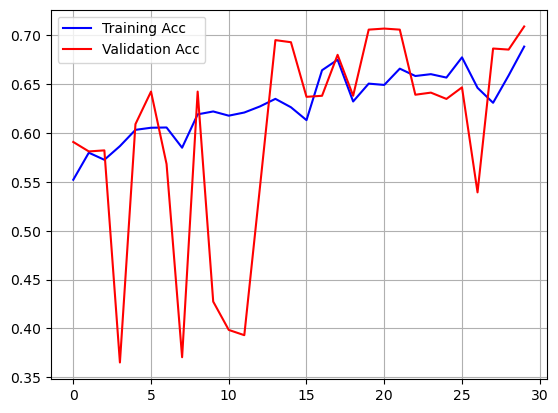

In [108]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
y_pred = model.predict(X_test)
#print(y_pred)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

acc = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f'accuracy : {acc}')
print(f'precision : {precision}')
print(f'recall : {recall}')

In [ ]:
D